In [1]:
!wget https://www.dropbox.com/sh/l1uzqobod13zryu/AACJju8_cJUNFOioKxBPTVFua?dl=0

--2020-10-12 12:50:10--  https://www.dropbox.com/sh/l1uzqobod13zryu/AACJju8_cJUNFOioKxBPTVFua?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/l1uzqobod13zryu/AACJju8_cJUNFOioKxBPTVFua [following]
--2020-10-12 12:50:10--  https://www.dropbox.com/sh/raw/l1uzqobod13zryu/AACJju8_cJUNFOioKxBPTVFua
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1a01651befc88cdf7b510b454.dl.dropboxusercontent.com/zip_download_get/AkhTa0hx5emhJD1v3EqXg_pzLnpaMOxIMKZ3Pos67QTSwSSiXusVSA96X8YXkdEyBPeW_J-Pzo1xzt-a3qsL0BdSKwRhcQTtjyVUNE-t9S9Xdg [following]
--2020-10-12 12:50:12--  https://ucc1a01651befc88cdf7b510b454.dl.dropboxusercontent.com/zip_download_get/AkhTa0hx5emhJD1v3EqXg_pzLnpaMOxIMKZ3Pos67QTSwSSiXusVSA96X8YXkdEyBPeW_J-Pzo1xzt-a3qsL

In [ ]:
!unzip Dataset

In [4]:
TRAIN_PATH="Dataset/Train"

In [5]:
VAL_PATH="Dataset/Test"

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN based model in keras-its going to be a sequential model
#So,what happens in building a CNN?We have multiple layers.1st layer has some number of filters,the next layer's got some more filters, & so on.
#Thus, its a layered architecture.

In [9]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#till here we have 4 Conc layers, now we'll add the dense layers.

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam',metrics=['accuracy'])

#used to detect feature in very tiny areas of the image.Its gonna learn a hidden pattern.As you go deeper into the layered network,
#the receptive feild of the CNN increases. So, the feature it extracts are quite a bigger part of the original picture.
#(3x3) is the standard kernel size picked


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [ ]:
#1:09:45

In [11]:
#Train from scratch
#so we'll use the keras image data generator library to make the data ready for the model
train_datagen=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_dataset=image.ImageDataGenerator(rescale=1./255)

In [12]:
#creating actual generator function
train_generator=train_datagen.flow_from_directory(
    'Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 314 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [14]:
validation_generator=test_dataset.flow_from_directory(
    'Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 78 images belonging to 2 classes.


In [15]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
8/8 [==============================] - 10s 1s/step - loss: 1.3477 - accuracy: 0.6000 - val_loss: 0.6613 - val_accuracy: 0.4844
Epoch 2/20
8/8 [==============================] - 10s 1s/step - loss: 0.5675 - accuracy: 0.7040 - val_loss: 0.5274 - val_accuracy: 0.9531
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.3469 - accuracy: 0.8360 - val_loss: 0.3025 - val_accuracy: 0.9219
Epoch 4/20
8/8 [==============================] - 10s 1s/step - loss: 0.2651 - accuracy: 0.8867 - val_loss: 0.1407 - val_accuracy: 0.9531
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: 0.1428 - accuracy: 0.9560 - val_loss: 0.2205 - val_accuracy: 0.9219
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.1167 - accuracy: 0.9600 - val_loss: 0.0929 - val_accuracy: 0.9688
Epoch 7/20
8/8 [==============================] - 10s 1s/step - loss: 0.1730 - accuracy: 0.9320 

In [ ]:
#Class Activation Maps
#Grad-CAM

In [16]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.08754798024892807, 0.9745222926139832]

In [17]:
model.evaluate_generator(validation_generator)

[0.16756571829319, 0.9487179517745972]

In [18]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [19]:
import os

In [20]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
y_actual=[]
y_test=[]

In [22]:
for i in os.listdir("./Val/Normal/"):
  img=image.load_img("./Val/Normal/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
for i in os.listdir("./Val/Covid/"):
  img=image.load_img("./Val/Covid/"+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [24]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm=confusion_matrix(y_actual, y_test)

In [27]:
import seaborn as sns

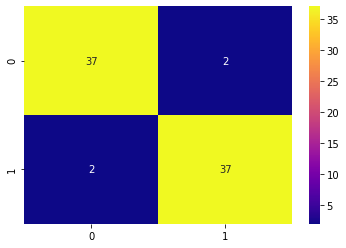

In [28]:
sns.heatmap(cm, cmap='plasma',annot=True)


In [ ]:
#0->covid, 1->normal
# TP, FN
# FP,TN